Published on October 31, 2024. By Marília Prata, mpwolke 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


## Competition Citation:

@misc{playground-series-s4e11,

    author = {Walter Reade and Elizabeth Park}
    ,
    title = {Exploring Mental Health Data
    },
    year = {202
    4},
    howpublished = {\url{https://kaggle.com/competitions/playground-series-s4e1
    1}},
    note = {Kaggle}

## Feeling the blues kaggler? Playground Series will cheer you up.

![](https://media1.tenor.com/m/Rix3clgwRngAAAAd/sad-pidgeon-crying-depression-bird-funny.gif)Tenor

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
df.tail()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0
140699,140699,Sai,Male,27.0,Patna,Student,NaN,4.0,NaN,9.24,1.0,NaN,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


## Spoiler alert! We have Missing values this time.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
df.describe().loc[['mean','min','max']].T

,mean,min,max
id,70349.500000,0.00,140699.0
Age,40.388621,18.00,60.0
Academic Pressure,3.142273,1.00,5.0
Work Pressure,2.998998,1.00,5.0
CGPA,7.658636,5.03,10.0
Study Satisfaction,2.944940,1.00,5.0
Job Satisfaction,2.974404,1.00,5.0
Work/Study Hours,6.252679,0.00,12.0
Financial Stress,2.988983,1.00,5.0
Depression,0.181713,0.00,1.0


## CGPA. Cumulative Grade Point Average.

CGPA stands for **Cumulative Grade Point Average**, which is a number or letter that summarizes a student's academic performance. It's calculated by averaging the GPA a student receives each semester.

Academic Performance (CGPA) Influences Mental Health: A Study of Students at Seremban Medical Assistant College (SMCA)

Authors: Nur Hani Syazwani Bakri, Nur Aisyah Nabila Mat Razali, Mohamad Firdaus Ahmad, Nur Syazwani Zulaikha Safwan, Nur Dalilah Dahlan, Ummi Khalthum Mokhtar 

"Medical  students, face  many  challenges  due  to  their  field  of  study  and expectations  of  their  profession.  It  is  widely  acknowledged  that  medical  courses  are  among  the  hardest academic   pursuits. Despite the awareness given, the stigma of mental health persists, leading medical students to hesitate in seeking help out of   fear   of   being   perceived   as   weak.   The   study identifies   whether   mental   health   influences   academic performance (CGPA) among medical students at Seremban Medical Assistant College (SMCA). This study used a  quantitative  method,  and  a  questionnaire  was  distributed  to  215  respondents.  Specifically,  it  was  observed  that  as  **CGPA increased**,  there  was  a  corresponding  **decrease  in  mental  health  among  the  students**.  This  shows  that  the students  are  experiencing  mental  health issues  due  to  their  responsibility  to  maintain  a  good  academic performance  in  their  field  of  study." 

"The  prevalence  of  mental  health  issues is  increasing  over  time.  University  students  are  not exempt  from  this  trend.  In  2019,  it  was  found  that  medical  students  enrolled  in  public  universities  experienced  mild  to  moderate  depression. This alarming increase highlights the urgent need  for  implementing  interventions  and  support  systems  to  address  mental health  concerns among university students.  Awareness of mental  health  should  be  expanded among  medical  students, particularly those   seeking   help  for mental health, behavioral, and unusual psychological experiences. This underscores the  need  to  emphasize  the  importance  of  this  matter among students in both public and private universities . Universities are where students seek knowledge, skills, and experience." 

"The objective is to **facilitate knowledge transfer, encompassing communication, critical thinking,  teamwork, multitasking, leadership, and creativity**. These skills are important  to **enhance employability** for fresh graduates to be well-equipped with the competencies that are expected by public and private entities. Employability skills are  important  qualifications that are needed by a graduate to secure  a  job  or  career. Graduates  from universities tend  to earn  35%  more  than  college  leavers.  In  addition,  the cumulative  grade point  average  (CGPA) is one of the key indicators of an individual's success in securing  positions within organizations.

### Depression, Anxiety and Stress (DAS)

"Depression can be categorized  as a severe  mental  health  condition  that is characterized by a feeling of sadness, loss of interest, impaired cognitive function and physical symptoms that lead to changes in appetite  and sleep  disorder. There  is a negative correlation between  depression  and  academic  performance. Depression can affect cognitive functioning, attention, memory, and decision-making and **influence academic performance.**"

"Understanding these groups is essential to **ensure their academic success and completion of studies**. It's required to create a supportive environment, promote mental well-being, and  reduce the stigma associated  with students and  mental health issues concerning preventive measures, policies, support systems, and personal consultations."
https://ojs.amhinternational.com/index.php/imbr/article/view/3808/2503


### CGPA anxiety

![](https://i.makeagif.com/media/9-30-2020/TeTmfB.gif)CGPA on Make a Gif

### Depression Pie-chart

At least, it seems the majority of the interviewed isn't depressed.

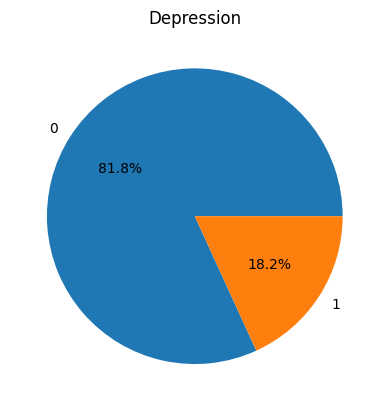

In [10]:
#plotting the piechart for Depression column.

depre = df['Depression'].value_counts()
plt.pie(depre.values,
        labels=depre.index,
        autopct='%1.1f%%')
plt.title('Depression')
plt.show()

## Which cities have more contributions on this survey.

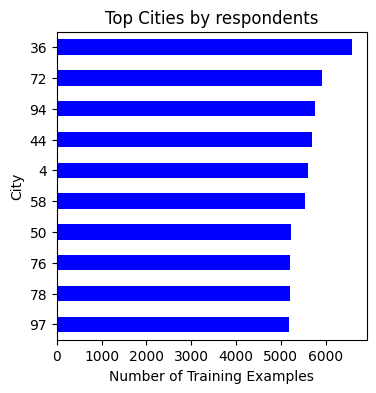

In [12]:
#By Rob Mulla https://www.kaggle.com/code/robikscube/sign-language-recognition-eda-twitch-stream

fig, ax = plt.subplots(figsize=(4, 4))
df["City"].value_counts().head(10).sort_values(ascending=True).plot(
    kind="barh", color='blue', ax=ax, title="Top Cities by respondents"
)
ax.set_xlabel("Number of Training Examples")
plt.show()

## Age Distribution

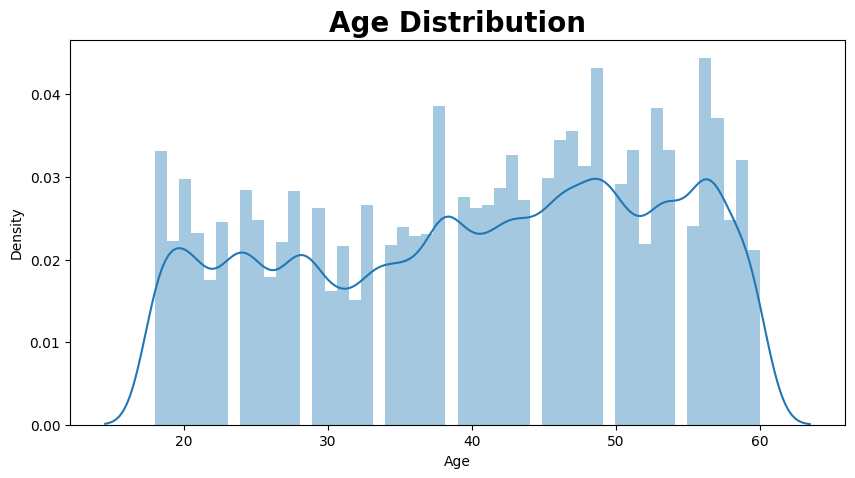

In [25]:
#By Shivamnijhawan  https://www.kaggle.com/code/shivamnijhawan96/mental-health-survey-exploration

def clean_age(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
df['Age'] = df['Age'].apply(clean_age)
plt.figure(figsize=(10,5))
sns.distplot(df['Age'].dropna())
plt.title("Age Distribution",fontsize=20,fontweight="bold")
plt.show()

## Work Pressure and Job Satisfaction Distributions

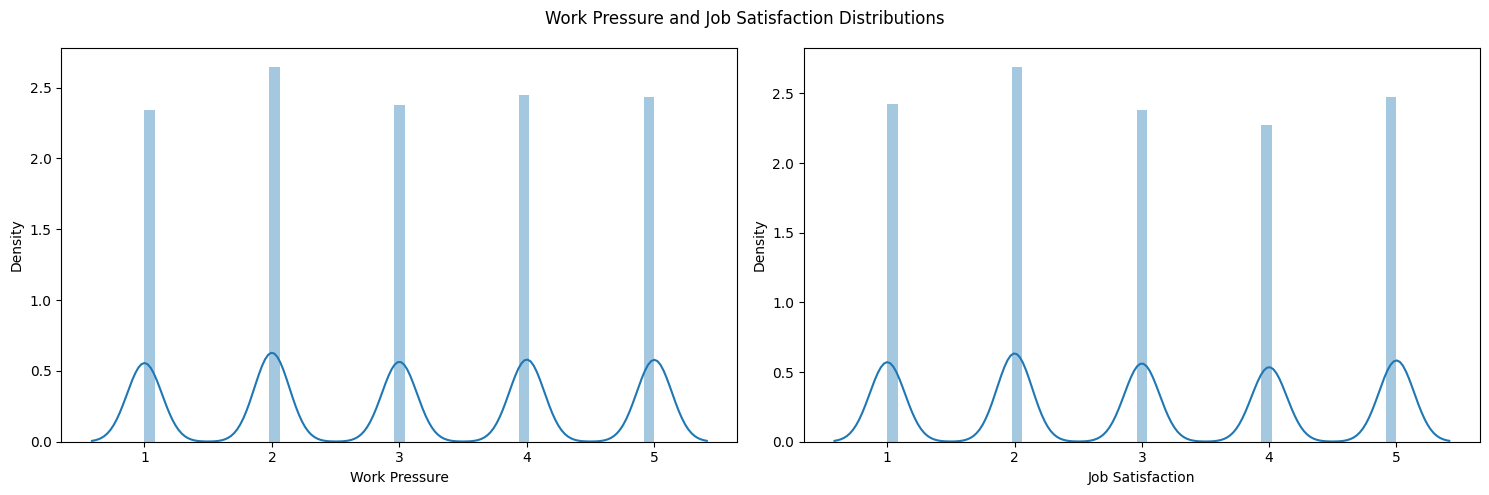

In [28]:
#GeeksForGeeks https://www.geeksforgeeks.org/loan-eligibility-prediction-using-machine-learning-models-in-python/

import seaborn as sb

fig, ax = plt.subplots(figsize=(15, 5))
#plt.subplots(figsize=(15, 5))
fig.suptitle('Work Pressure and Job Satisfaction Distributions')
for i, col in enumerate(['Work Pressure', 'Job Satisfaction']):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
plt.tight_layout()

plt.show()

## Suicidal thoughts by Gender

Do male have more suicidal thoughts?

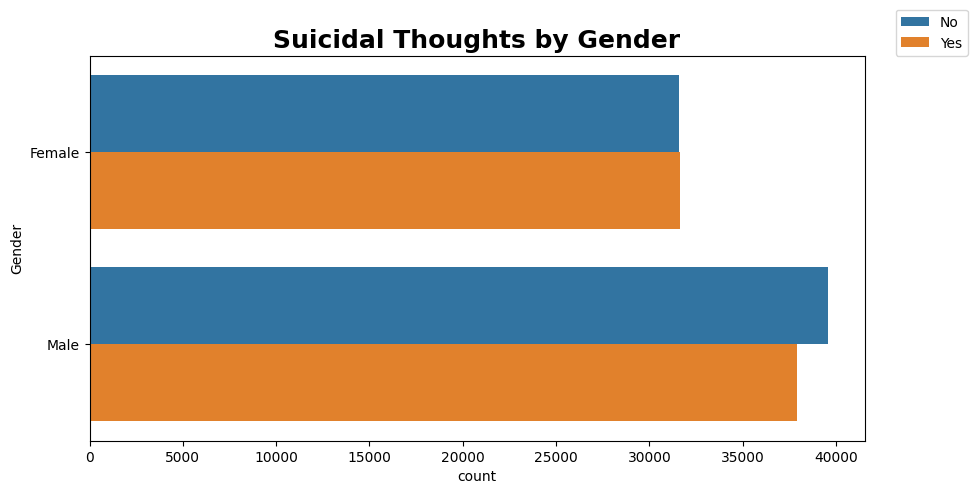

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(y="Gender", hue="Have you ever had suicidal thoughts ?", data=df)
plt.title("Suicidal Thoughts by Gender",fontsize=18,fontweight="bold")
plt.legend(loc=(1.04, 1))#StackOverFlow
plt.ylabel("Gender")
plt.show()

## Family History of Mental Illness by Gender

Do male have more family history of mental illness.

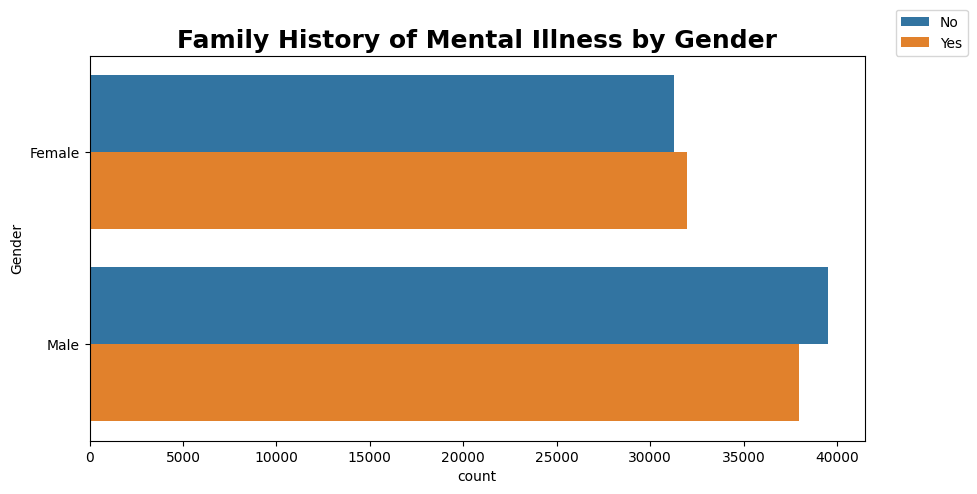

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(y="Gender", hue="Family History of Mental Illness", data=df)
plt.title("Family History of Mental Illness by Gender",fontsize=18,fontweight="bold")
plt.legend(loc=(1.04, 1))#StackOverFlow
plt.ylabel("Gender")
plt.show()

## Using a FacetGrid to visualize the relationship of Depression and the other features

Relation between Depression  and the most/least correlated features

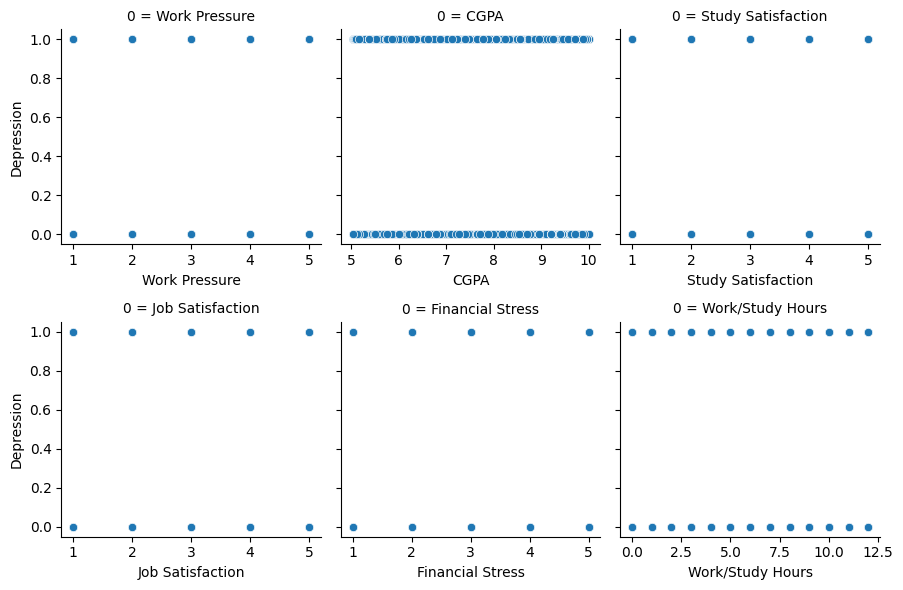

In [36]:
#https://github.com/mwaskom/seaborn/issues/2121 SIMPLE WAY
# https://stackoverflow.com/questions/68506546/how-to-draw-a-figure-by-seaborn-pairplot-in-several-rows

x_vars = ["Work Pressure", "CGPA", "Study Satisfaction", "Job Satisfaction", "Financial Stress", "Work/Study Hours"]
y_var = "Depression"

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=3, sharex=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=df, x=x_var, y=y_var, ax=ax)
g.tight_layout();

## Histograms of each numerical feature

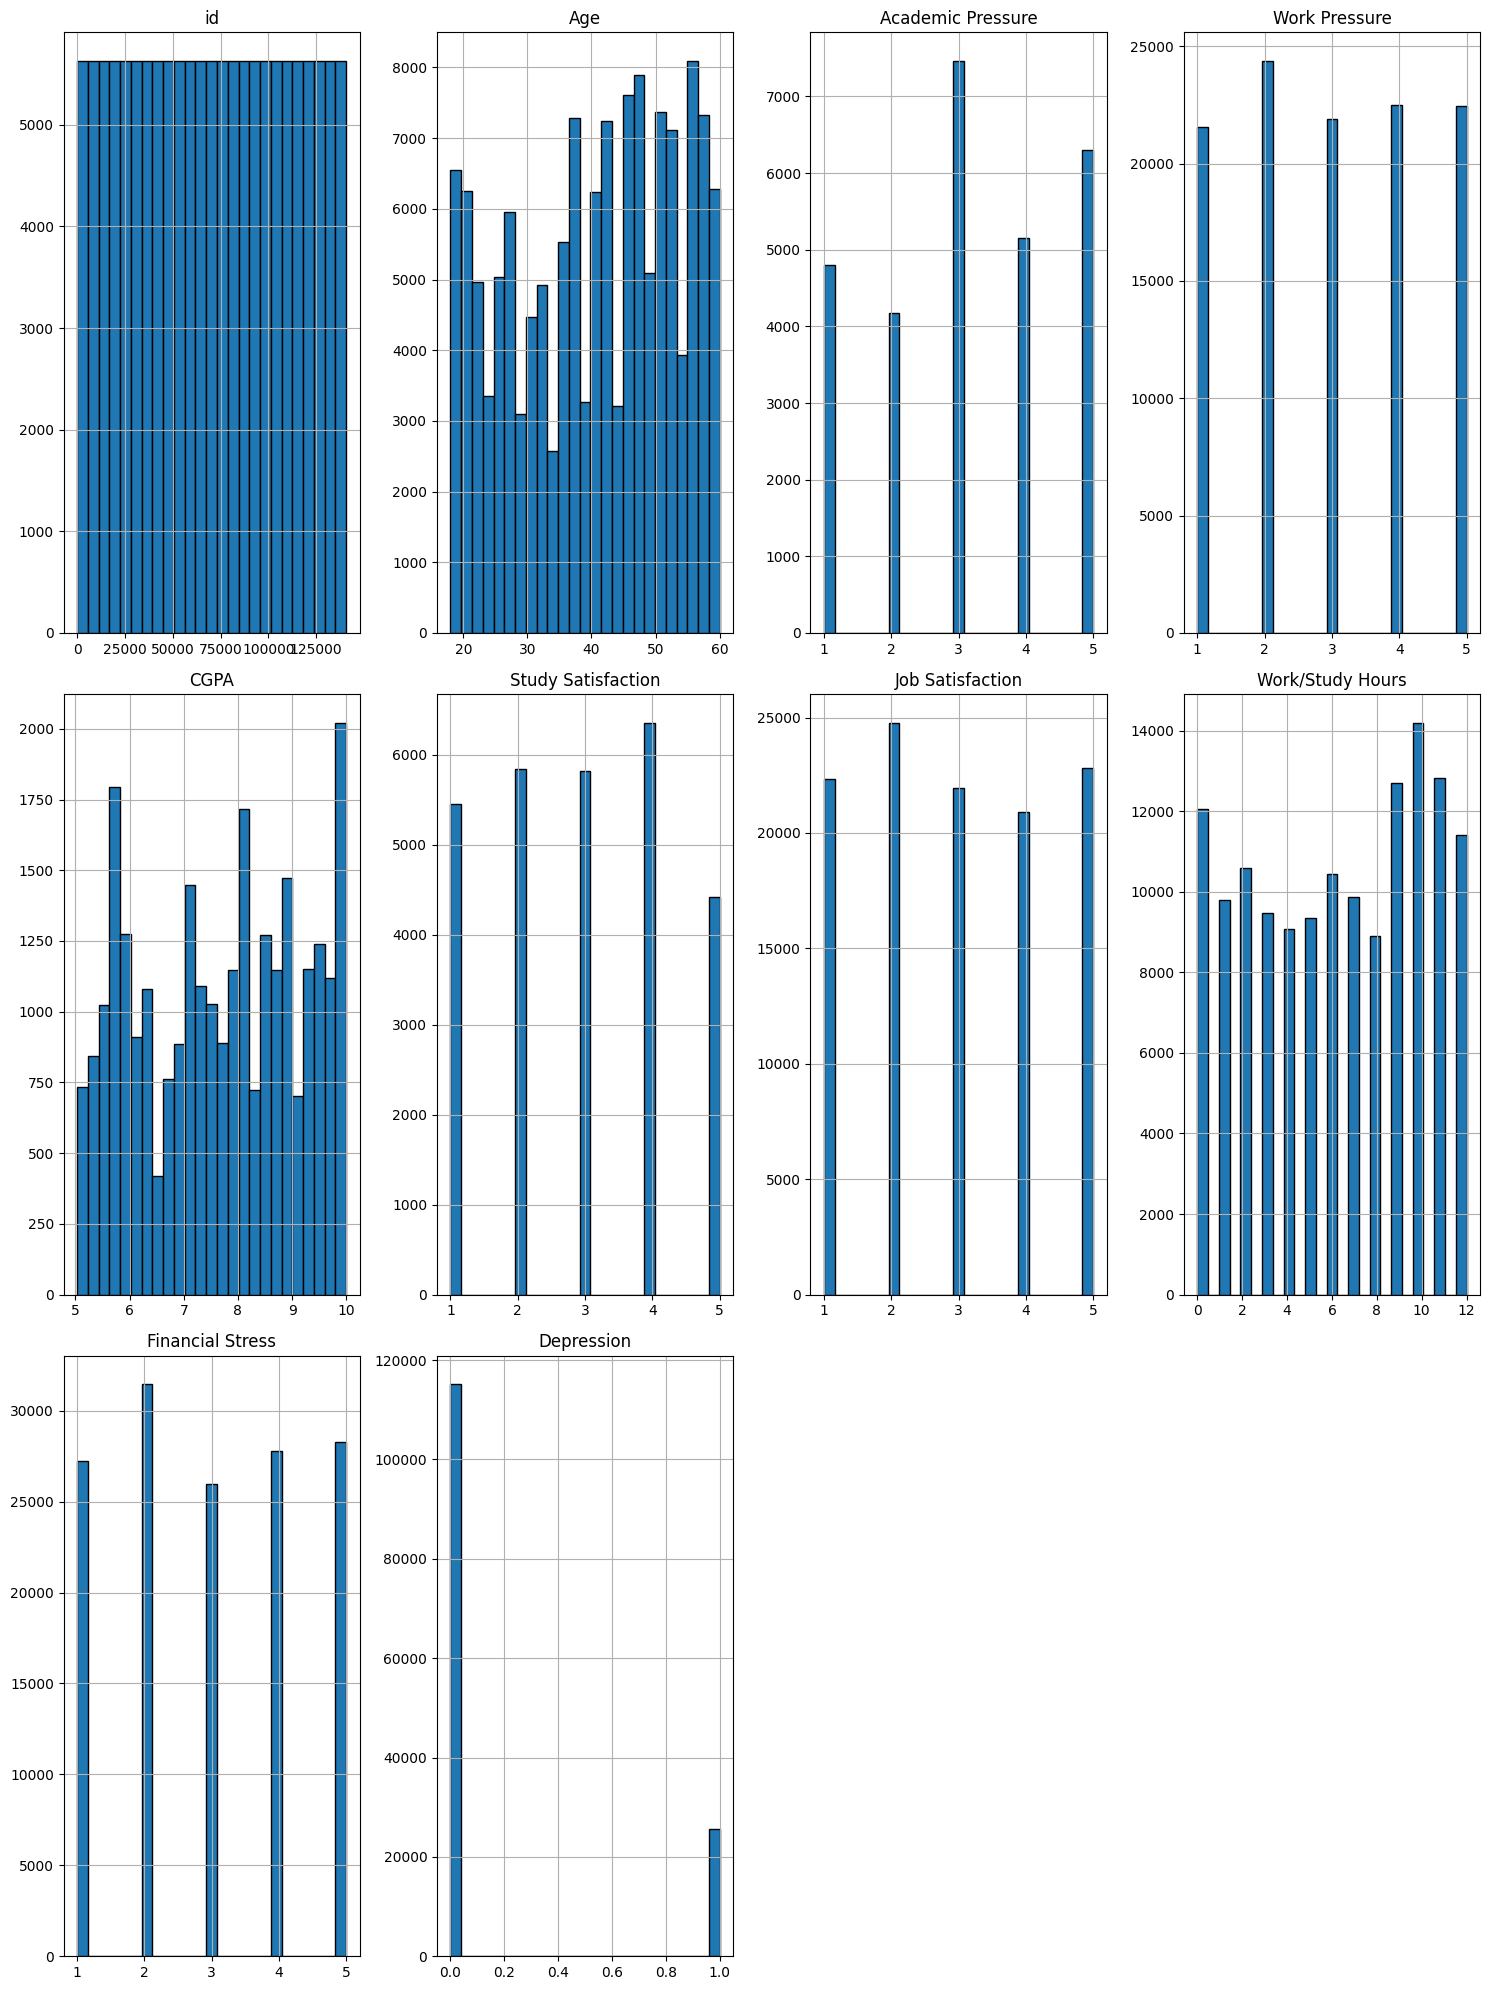

In [38]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 20), layout=(-1, 4), edgecolor="black")
plt.tight_layout()

## Dietary Habits by Gender

Some dietary habits are weird Ex: Mihir (it's a male name), Eletrician and hormonal just to mention some of the answers.

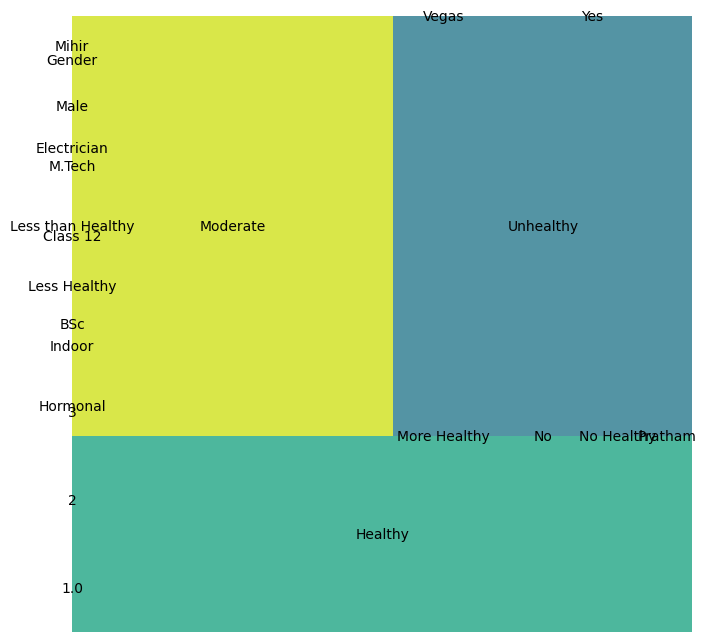

In [43]:
#By Raja CSP https://www.kaggle.com/code/rajacsp/netflix-visualization-plotly-plots-treemap/notebook

import squarify

df_crime_series = df.groupby('Dietary Habits')['Gender'].count()

crime_sizes = []
crime_labels = []
for i, v in df_crime_series.items():
    crime_sizes.append(v)
    crime_labels.append(i)
    

fig, ax = plt.subplots(1, figsize = (8,8))
squarify.plot(sizes=crime_sizes, 
              label=crime_labels, 
              alpha=.8 )
plt.axis('off')
plt.show()

In [47]:
#Raja CSP https://www.kaggle.com/code/rajacsp/netflix-visualization-plotly-plots-treemap#Treemap

# Let's create more treemap by converting the code as function
# I have used only top 10 item to avoid confusion

import squarify

def show_treemap(col):
    df_type_series = df.groupby(col)['Gender'].count().sort_values(ascending = False).head(10)

    type_sizes = []
    type_labels = []
    for i, v in df_type_series.items():
        type_sizes.append(v)
        
        type_labels.append(str(i) + ' ('+str(v)+')')


    fig, ax = plt.subplots(1, figsize = (8,8))
    squarify.plot(sizes=type_sizes, 
                  label=type_labels[:10],  # show labels for only first 10 items
                  alpha=.2 )
    plt.title('TreeMap by '+ str(col))
    plt.axis('off')
    plt.show()

## Teachers are on top of Depression by profession

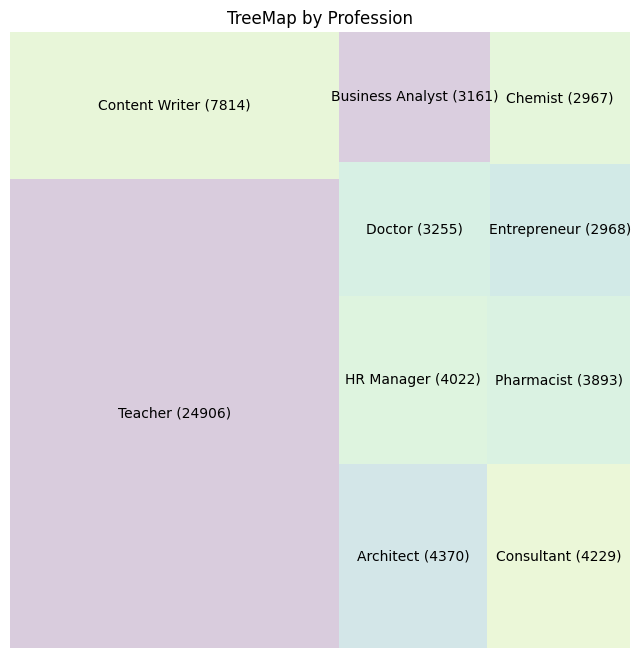

In [48]:
show_treemap('Profession')

## Degrees  - The 12th grade on top?

B.Ed = Bachelor of Education

BBA= Bachelor of Business Administration

Master of Education (M.Ed.)

Bachelor of Commerce (BCom)

Master of Accountancy

Master of Education = Master of Education

BSc = Bachelor of Sciences

Class12 = The 12th grade, the final year of high school

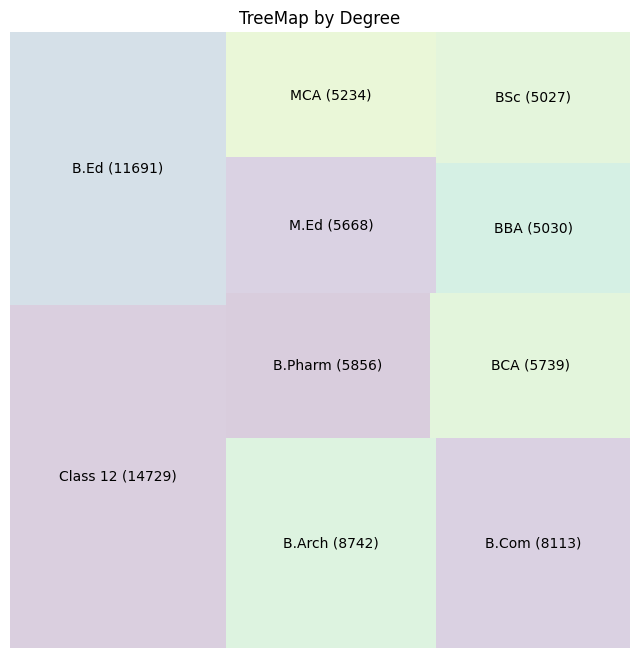

In [49]:
show_treemap('Degree')

In [5]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
for i in df.columns:
    df[i] = number.fit_transform(df[i].astype('str'))

In [6]:
corr=df.corr()['Depression']
corr[np.argsort(corr,axis=0)[::-1]]

Depression                               1.000000
Work Pressure                            0.458860
Profession                               0.353820
Have you ever had suicidal thoughts ?    0.349066
Job Satisfaction                         0.281348
Financial Stress                         0.227228
Dietary Habits                           0.143445
Family History of Mental Illness         0.016502
Sleep Duration                           0.014454
Gender                                   0.008144
Work/Study Hours                         0.001918
id                                      -0.003959
City                                    -0.020915
Name                                    -0.028897
Degree                                  -0.045514
Academic Pressure                       -0.330096
CGPA                                    -0.419012
Study Satisfaction                      -0.508850
Working Professional or Student         -0.520790
Age                                     -0.564671


### Correlation Matrix

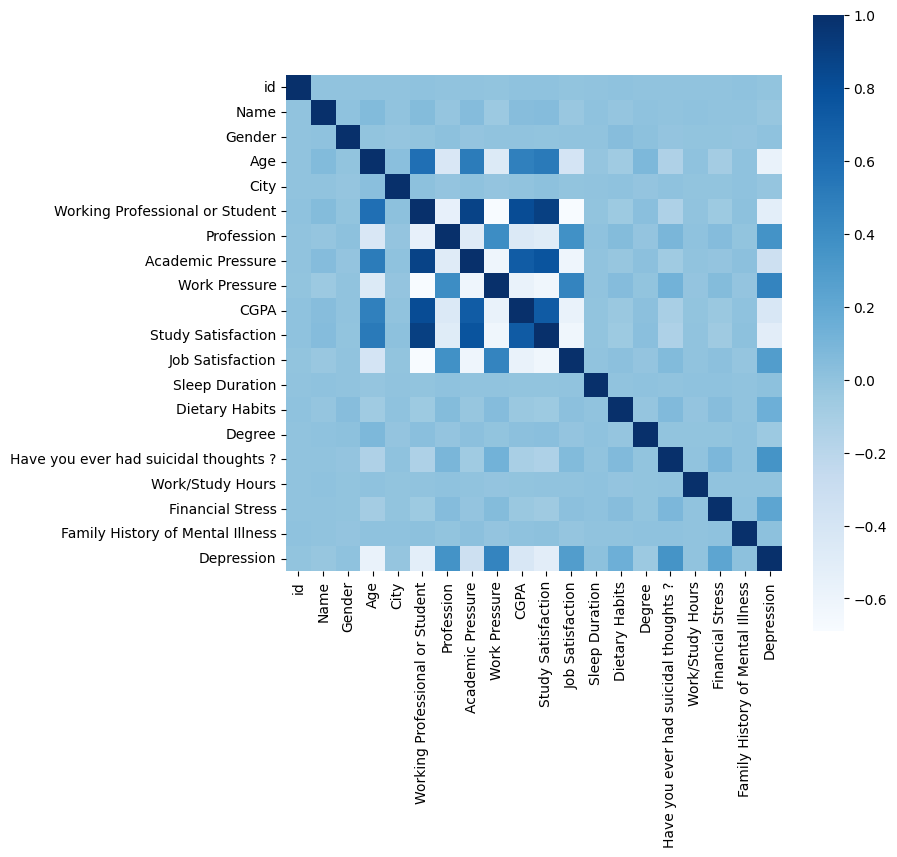

In [7]:
features_correlation = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

## Check the Correlation Matrix to get the features below

'Depression', 'Working Professional or Student', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction' are correlated with each other

Those that I picked are in the the square in the middle above.

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(['Depression', 'Working Professional or Student', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction'], axis=1)
y = df.Depression
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

#Fit XGBOOST

split the data

In [9]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('ACCURACY : ',accuracy*100,'%')

ACCURACY :  91.95688225538971 %


#Feature Importance

id = 0.0070583182
Name = 0.008728827
Gender = 0.0077915853
Age = 0.29177722
City = 0.007821203
Sleep Duration = 0.016460143
Dietary Habits = 0.044455774
Degree = 0.012725941
Have you ever had suicidal thoughts ? = 0.48222136
Work/Study Hours = 0.028634652
Financial Stress = 0.0827176
Family History of Mental Illness = 0.00960736


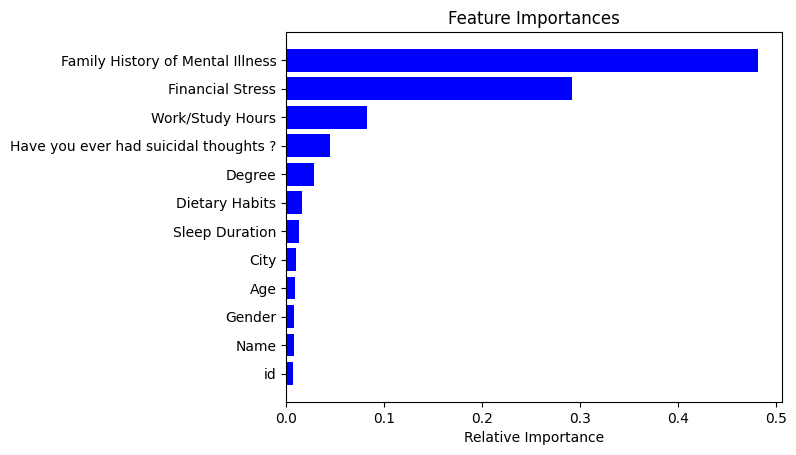

In [10]:
features = X.columns
for name, importance in zip(features, xgb.feature_importances_):
    print(name, "=", importance)

importances = xgb.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) 
plt.xlabel('Relative Importance')
plt.show()

#Evaluating the Model - Confusion Matrix

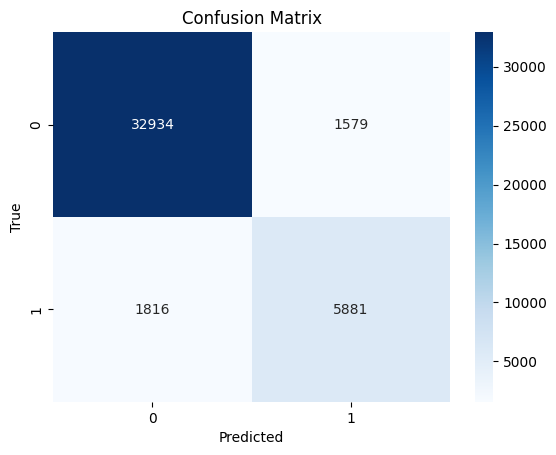

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt='',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Fortunately, we have much less depressed interviewed than those that are feeling the blues.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjq5gg-MDV1BJlb7xO4F6y0G4ONpN7Yj7OLQ&s)https://www.instagram.com/_data_science_memes_/p/CwzRj1_reaW/

#Acknowledgements:

Shivamnijhawan  https://www.kaggle.com/code/shivamnijhawan96/mental-health-survey-exploration

GeeksForGeeks https://www.geeksforgeeks.org/loan-eligibility-prediction-using-machine-learning-models-in-python/

Rob Mulla https://www.kaggle.com/code/robikscube/sign-language-recognition-eda-twitch-stream
